In [2]:
#데이터 구성
import pandas as pd

#행렬 연산
import numpy as np

#데이터 시각화
import matplotlib; import matplotlib.pyplot as plt

#데이터 시각화 산점도 행렬, 추세
import seaborn as sns

#scale 변환 평균 표준편차 기준
from sklearn.preprocessing import StandardScaler

#주성분 분석
from sklearn.decomposition import PCA

#회귀 분석
import statsmodels.api as sm

#폰트적용
matplotlib.rc('font', family="NanumBarunGothic")

In [3]:
#파일 불러오기
users=pd.read_csv('//home/piai/바탕화면/cvs_users.csv',encoding='cp949')
weather=pd.read_csv('//home/piai/바탕화면/cvs_weather.csv',encoding='cp949')
sales=pd.read_csv('//home/piai/바탕화면/cvs_sales.csv',encoding='cp949')
items=pd.read_csv('//home/piai/바탕화면/cvs_items.csv',encoding='cp949')

In [4]:
#user 변수 정리 - UserYear
users=users.drop('UserYear', axis=1)

In [5]:
users=users.drop_duplicates()
users

,idUser,Gender,AgeGroup
0,U100001,남성,40대
2,U100002,여성,30대
4,U100003,남성,30대
6,U100004,남성,30대
8,U100005,여성,30대
...,...,...,...
2112,U101094,남성,10대
2114,U101095,남성,40대
2116,U101096,여성,30대
2118,U101097,남성,30대


In [6]:
items.head()

,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemId,ItemName,Item_CatORMaker,Price,ImageUrl
0,L1,간편식사,M1,도시락,I-8801068371857,샐)치킨찹찹샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1,L1,간편식사,M1,도시락,I-8801068371864,샐)퀴노아바질샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
2,L1,간편식사,M1,도시락,I-8801068378887,샐)에그가먼저닭샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3,L1,간편식사,M1,도시락,I-8801068388664,샐)흑임자치킨샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4,L1,간편식사,M1,도시락,I-8801068389340,면)나폴리탄파스타,면,4000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...


In [7]:
items =items.drop(['ImageUrl'],axis=1)

In [8]:
items.head()

,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemId,ItemName,Item_CatORMaker,Price
0,L1,간편식사,M1,도시락,I-8801068371857,샐)치킨찹찹샐러드,샐러드,3500
1,L1,간편식사,M1,도시락,I-8801068371864,샐)퀴노아바질샐러드,샐러드,3500
2,L1,간편식사,M1,도시락,I-8801068378887,샐)에그가먼저닭샐러드,샐러드,3500
3,L1,간편식사,M1,도시락,I-8801068388664,샐)흑임자치킨샐러드,샐러드,3500
4,L1,간편식사,M1,도시락,I-8801068389340,면)나폴리탄파스타,면,4000


In [9]:
weather

,AreaId,Area,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax
0,108,서울,2020-01-01,-2.2,-6.5,1,0.3,1457,9.83,0.1,64.4,0.0,NaN
1,108,서울,2020-01-02,1.0,-0.7,1,3.8,1500,NaN,NaN,65.4,NaN,NaN
2,108,서울,2020-01-03,-0.1,-3.4,807,4.6,1547,NaN,NaN,56.9,NaN,NaN
3,108,서울,2020-01-04,1.2,-2.8,512,6.1,1450,NaN,NaN,50.8,NaN,NaN
4,108,서울,2020-01-05,1.3,-3.2,821,6.6,1453,NaN,NaN,45.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,108,서울,2021-12-27,-7.6,-12.9,123,-3.9,1634,2.08,0.0,60.9,NaN,NaN
727,108,서울,2021-12-28,-4.1,-8.5,712,-0.9,1600,NaN,NaN,73.8,NaN,NaN
728,108,서울,2021-12-29,0.4,-3.8,154,5.9,1518,1.58,0.2,72.9,0.3,455.0
729,108,서울,2021-12-30,-3.9,-6.8,714,0.2,1531,0.50,0.0,48.5,NaN,NaN


In [10]:
weather = weather.drop(['AreaId','Area','SnowloadMax','hhmiSnowloadMax','hhmiTempMin','hhmiTempMax'],axis=1)

In [11]:
weather['TempDiff']=weather['TempMax']-weather['TempMin']

In [12]:
weather= weather.fillna(0)

In [13]:
weather.head()

,dateObs,TempAvg,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,TempDiff
0,2020-01-01,-2.2,-6.5,0.3,9.83,0.1,64.4,6.8
1,2020-01-02,1.0,-0.7,3.8,0.00,0.0,65.4,4.5
2,2020-01-03,-0.1,-3.4,4.6,0.00,0.0,56.9,8.0
3,2020-01-04,1.2,-2.8,6.1,0.00,0.0,50.8,8.9
4,2020-01-05,1.3,-3.2,6.6,0.00,0.0,45.6,9.8


In [14]:
#강수량 관련 결측치 채우기

# 데이터 결합하기

In [15]:
df=sales.merge(users, on='idUser', how='left')
df.head()

,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,ItemId,ItemName,Gender,AgeGroup
0,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801007795751,CJ)고메모짜돈카츠450g,남성,40대
1,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801056170059,롯)칠성사이다복숭아P500,남성,40대
2,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8809640112157,PSK)스윗사파이어포도400g,남성,40대
3,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8801045611211,오뚜기)물엿700g,남성,40대
4,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8809253648470,22del)헤이즐넛향1L,남성,40대


In [16]:
df=df.merge(items, on='ItemId', how='left')
df.head()

,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,ItemId,ItemName_x,Gender,AgeGroup,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName_y,Item_CatORMaker,Price
0,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801007795751,CJ)고메모짜돈카츠450g,남성,40대,L5,식품,M1,가공식사,CJ)고메모짜돈카츠450g,CJ,10000
1,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801056170059,롯)칠성사이다복숭아P500,남성,40대,L6,음료,M1,음료,롯)칠성사이다복숭아P500,롯,2200
2,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8809640112157,PSK)스윗사파이어포도400g,남성,40대,L5,식품,M3,식재료,PSK)스윗사파이어포도400g,PSK,6800
3,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8801045611211,오뚜기)물엿700g,남성,40대,L5,식품,M3,식재료,오뚜기)물엿700g,오뚜기,3000
4,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8809253648470,22del)헤이즐넛향1L,남성,40대,L6,음료,M2,아이스링크,22del)헤이즐넛향1L,22del,3500


In [17]:
df = df.drop('ItemName_y',axis=1)
df = df.rename(columns={'ItemName_x':'ItemName'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510223 entries, 0 to 510222
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   idUser           510223 non-null  object
 1   idPOS            510223 non-null  object
 2   SalesDT          510223 non-null  object
 3   SalesDate        510223 non-null  object
 4   SalesYear        510223 non-null  int64 
 5   SalesYearMonth   510223 non-null  object
 6   SalesMonth       510223 non-null  int64 
 7   SalesDow         510223 non-null  object
 8   SalesHour        510223 non-null  int64 
 9   ItemId           510223 non-null  object
 10  ItemName         510223 non-null  object
 11  Gender           510223 non-null  object
 12  AgeGroup         510223 non-null  object
 13  ItemIdLarge      510223 non-null  object
 14  ItemNameLarge    510223 non-null  object
 15  ItemIdMiddle     510223 non-null  object
 16  ItemNameMiddle   510223 non-null  object
 17  Item_CatOR

In [18]:
df.head()

,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,ItemId,ItemName,Gender,AgeGroup,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,Item_CatORMaker,Price
0,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801007795751,CJ)고메모짜돈카츠450g,남성,40대,L5,식품,M1,가공식사,CJ,10000
1,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801056170059,롯)칠성사이다복숭아P500,남성,40대,L6,음료,M1,음료,롯,2200
2,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8809640112157,PSK)스윗사파이어포도400g,남성,40대,L5,식품,M3,식재료,PSK,6800
3,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8801045611211,오뚜기)물엿700g,남성,40대,L5,식품,M3,식재료,오뚜기,3000
4,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8809253648470,22del)헤이즐넛향1L,남성,40대,L6,음료,M2,아이스링크,22del,3500


In [19]:
weather.head()

,dateObs,TempAvg,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,TempDiff
0,2020-01-01,-2.2,-6.5,0.3,9.83,0.1,64.4,6.8
1,2020-01-02,1.0,-0.7,3.8,0.00,0.0,65.4,4.5
2,2020-01-03,-0.1,-3.4,4.6,0.00,0.0,56.9,8.0
3,2020-01-04,1.2,-2.8,6.1,0.00,0.0,50.8,8.9
4,2020-01-05,1.3,-3.2,6.6,0.00,0.0,45.6,9.8


In [20]:
weather.rename(columns={'dateObs':'SalesDate'}, inplace=True)

In [21]:
df=df.merge(weather, on='SalesDate', how='left')
df.head()

,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,ItemId,...,ItemNameMiddle,Item_CatORMaker,Price,TempAvg,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,TempDiff
0,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801007795751,...,가공식사,CJ,10000,-2.2,-6.5,0.3,9.83,0.1,64.4,6.8
1,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801056170059,...,음료,롯,2200,-2.2,-6.5,0.3,9.83,0.1,64.4,6.8
2,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8809640112157,...,식재료,PSK,6800,-2.2,-6.5,0.3,9.83,0.1,64.4,6.8
3,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8801045611211,...,식재료,오뚜기,3000,1.3,-3.2,6.6,0.00,0.0,45.6,9.8
4,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8809253648470,...,아이스링크,22del,3500,1.3,-3.2,6.6,0.00,0.0,45.6,9.8


In [22]:
df1=df.groupby('idPOS', as_index=False)['ItemNameMiddle'].agg(lambda x: '|'.join(x))
df1.head()

,idPOS,ItemNameMiddle
0,U100001-POS2020-10001,가공식사|음료|식재료
1,U100001-POS2020-10004,식재료|아이스링크
2,U100001-POS2020-10006,가공식사
3,U100001-POS2020-10008,유제품
4,U100277-POS2021-10082,튀김류


In [23]:
df2=df.groupby('idPOS', as_index=False)['ItemName'].agg(lambda x: '|'.join(x))
df2.head()

,idPOS,ItemName
0,U100001-POS2020-10001,CJ)고메모짜돈카츠450g|롯)칠성사이다복숭아P500|PSK)스윗사파이어포도400g
1,U100001-POS2020-10004,오뚜기)물엿700g|22del)헤이즐넛향1L
2,U100001-POS2020-10006,오뚜기)스낵면
3,U100001-POS2020-10008,남양)이오20s135ml
4,U100277-POS2021-10082,튀김)쫄깃매콤닭다리꼬치


In [24]:
df3=df.groupby('idPOS', as_index=False).agg('Price').sum()
df3

,idPOS,Price
0,U100001-POS2020-10001,19000
1,U100001-POS2020-10004,6500
2,U100001-POS2020-10006,750
3,U100001-POS2020-10008,1000
4,U100277-POS2021-10082,1700
...,...,...
216042,U101098-POS2021-10198,10900
216043,U101098-POS2021-10203,4100
216044,U101098-POS2021-10207,1500
216045,U101098-POS2021-10210,3800


In [25]:
df4=df1.merge(df3, on='idPOS', how='left')
df4.head()

,idPOS,ItemNameMiddle,Price
0,U100001-POS2020-10001,가공식사|음료|식재료,19000
1,U100001-POS2020-10004,식재료|아이스링크,6500
2,U100001-POS2020-10006,가공식사,750
3,U100001-POS2020-10008,유제품,1000
4,U100277-POS2021-10082,튀김류,1700


In [26]:
df5=df4.merge(df, on='idPOS', how='right')
df5.head()

,idPOS,ItemNameMiddle_x,Price_x,idUser,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,...,ItemNameMiddle_y,Item_CatORMaker,Price_y,TempAvg,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,TempDiff
0,U100001-POS2020-10001,가공식사|음료|식재료,19000,U100001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,...,가공식사,CJ,10000,-2.2,-6.5,0.3,9.83,0.1,64.4,6.8
1,U100001-POS2020-10001,가공식사|음료|식재료,19000,U100001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,...,음료,롯,2200,-2.2,-6.5,0.3,9.83,0.1,64.4,6.8
2,U100001-POS2020-10001,가공식사|음료|식재료,19000,U100001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,...,식재료,PSK,6800,-2.2,-6.5,0.3,9.83,0.1,64.4,6.8
3,U100001-POS2020-10004,식재료|아이스링크,6500,U100001,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,...,식재료,오뚜기,3000,1.3,-3.2,6.6,0.00,0.0,45.6,9.8
4,U100001-POS2020-10004,식재료|아이스링크,6500,U100001,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,...,아이스링크,22del,3500,1.3,-3.2,6.6,0.00,0.0,45.6,9.8


In [27]:
df5.drop_duplicates('idPOS',inplace=True)
df5.head()

,idPOS,ItemNameMiddle_x,Price_x,idUser,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,...,ItemNameMiddle_y,Item_CatORMaker,Price_y,TempAvg,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,TempDiff
0,U100001-POS2020-10001,가공식사|음료|식재료,19000,U100001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,...,가공식사,CJ,10000,-2.2,-6.5,0.3,9.83,0.1,64.4,6.8
3,U100001-POS2020-10004,식재료|아이스링크,6500,U100001,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,...,식재료,오뚜기,3000,1.3,-3.2,6.6,0.00,0.0,45.6,9.8
5,U100001-POS2020-10006,가공식사,750,U100001,2020-01-09T00:42:18,2020-01-09,2020,2020-01,1,목요일,...,가공식사,오뚜기,750,-1.2,-3.1,2.0,0.00,0.0,65.3,5.1
6,U100001-POS2020-10008,유제품,1000,U100001,2020-01-12T06:16:24,2020-01-12,2020,2020-01,1,일요일,...,유제품,남양,1000,-1.0,-3.5,2.8,0.00,0.0,61.5,6.3
7,U100831-POS2021-10308,가공식사,1000,U100831,2021-09-15T20:34:30,2021-09-15,2021,2021-09,9,수요일,...,가공식사,농심,1000,23.6,19.5,28.9,0.00,0.0,57.5,9.4


In [28]:
df5['ItemName']

0         CJ)고메모짜돈카츠450g
3             오뚜기)물엿700g
5                오뚜기)스낵면
6          남양)이오20s135ml
7               농심)멸치칼국수
               ...      
510204        오리온)아이셔팝캔디
510209      징코)크림치즈호두단팥빵
510214      하겐)프로즌요거트미니컵
510221    CJ)오곡참깨드레싱105g
510222    만인산)상추깻잎혼합팩80g
Name: ItemName, Length: 216047, dtype: object

In [29]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216047 entries, 0 to 510222
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   idPOS             216047 non-null  object 
 1   ItemNameMiddle_x  216047 non-null  object 
 2   Price_x           216047 non-null  int64  
 3   idUser            216047 non-null  object 
 4   SalesDT           216047 non-null  object 
 5   SalesDate         216047 non-null  object 
 6   SalesYear         216047 non-null  int64  
 7   SalesYearMonth    216047 non-null  object 
 8   SalesMonth        216047 non-null  int64  
 9   SalesDow          216047 non-null  object 
 10  SalesHour         216047 non-null  int64  
 11  ItemId            216047 non-null  object 
 12  ItemName          216047 non-null  object 
 13  Gender            216047 non-null  object 
 14  AgeGroup          216047 non-null  object 
 15  ItemIdLarge       216047 non-null  object 
 16  ItemNameLarge     21

In [30]:
df5= df5.drop(['ItemId','ItemName','ItemIdLarge','ItemIdMiddle','ItemNameMiddle_y','Price_y','Item_CatORMaker','ItemNameLarge'],axis=1)

In [31]:
df5.head()

,idPOS,ItemNameMiddle_x,Price_x,idUser,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,Gender,AgeGroup,TempAvg,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,TempDiff
0,U100001-POS2020-10001,가공식사|음료|식재료,19000,U100001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,남성,40대,-2.2,-6.5,0.3,9.83,0.1,64.4,6.8
3,U100001-POS2020-10004,식재료|아이스링크,6500,U100001,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,남성,40대,1.3,-3.2,6.6,0.00,0.0,45.6,9.8
5,U100001-POS2020-10006,가공식사,750,U100001,2020-01-09T00:42:18,2020-01-09,2020,2020-01,1,목요일,0,남성,40대,-1.2,-3.1,2.0,0.00,0.0,65.3,5.1
6,U100001-POS2020-10008,유제품,1000,U100001,2020-01-12T06:16:24,2020-01-12,2020,2020-01,1,일요일,6,남성,40대,-1.0,-3.5,2.8,0.00,0.0,61.5,6.3
7,U100831-POS2021-10308,가공식사,1000,U100831,2021-09-15T20:34:30,2021-09-15,2021,2021-09,9,수요일,20,남성,30대,23.6,19.5,28.9,0.00,0.0,57.5,9.4


In [32]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216047 entries, 0 to 510222
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   idPOS             216047 non-null  object 
 1   ItemNameMiddle_x  216047 non-null  object 
 2   Price_x           216047 non-null  int64  
 3   idUser            216047 non-null  object 
 4   SalesDT           216047 non-null  object 
 5   SalesDate         216047 non-null  object 
 6   SalesYear         216047 non-null  int64  
 7   SalesYearMonth    216047 non-null  object 
 8   SalesMonth        216047 non-null  int64  
 9   SalesDow          216047 non-null  object 
 10  SalesHour         216047 non-null  int64  
 11  Gender            216047 non-null  object 
 12  AgeGroup          216047 non-null  object 
 13  TempAvg           216047 non-null  float64
 14  TempMin           216047 non-null  float64
 15  TempMax           216047 non-null  float64
 16  hourRainfall      21

In [33]:
data=df5.merge(df2,on="idPOS",how="left")

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216047 entries, 0 to 216046
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   idPOS             216047 non-null  object 
 1   ItemNameMiddle_x  216047 non-null  object 
 2   Price_x           216047 non-null  int64  
 3   idUser            216047 non-null  object 
 4   SalesDT           216047 non-null  object 
 5   SalesDate         216047 non-null  object 
 6   SalesYear         216047 non-null  int64  
 7   SalesYearMonth    216047 non-null  object 
 8   SalesMonth        216047 non-null  int64  
 9   SalesDow          216047 non-null  object 
 10  SalesHour         216047 non-null  int64  
 11  Gender            216047 non-null  object 
 12  AgeGroup          216047 non-null  object 
 13  TempAvg           216047 non-null  float64
 14  TempMin           216047 non-null  float64
 15  TempMax           216047 non-null  float64
 16  hourRainfall      21

In [35]:
data.rename(columns={'Price_x':'Price'}, inplace=True)

In [36]:
data.rename(columns={'ItemNameMiddle_x':'ItemNameMiddle'}, inplace=True)

In [37]:
data.columns

Index(['idPOS', 'ItemNameMiddle', 'Price', 'idUser', 'SalesDT', 'SalesDate',
       'SalesYear', 'SalesYearMonth', 'SalesMonth', 'SalesDow', 'SalesHour',
       'Gender', 'AgeGroup', 'TempAvg', 'TempMin', 'TempMax', 'hourRainfall',
       'RainfallAmount', 'HumidAvg', 'TempDiff', 'ItemName'],
      dtype='object')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216047 entries, 0 to 216046
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   idPOS           216047 non-null  object 
 1   ItemNameMiddle  216047 non-null  object 
 2   Price           216047 non-null  int64  
 3   idUser          216047 non-null  object 
 4   SalesDT         216047 non-null  object 
 5   SalesDate       216047 non-null  object 
 6   SalesYear       216047 non-null  int64  
 7   SalesYearMonth  216047 non-null  object 
 8   SalesMonth      216047 non-null  int64  
 9   SalesDow        216047 non-null  object 
 10  SalesHour       216047 non-null  int64  
 11  Gender          216047 non-null  object 
 12  AgeGroup        216047 non-null  object 
 13  TempAvg         216047 non-null  float64
 14  TempMin         216047 non-null  float64
 15  TempMax         216047 non-null  float64
 16  hourRainfall    216047 non-null  float64
 17  RainfallAm

In [39]:
data.head()

,idPOS,ItemNameMiddle,Price,idUser,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,...,Gender,AgeGroup,TempAvg,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,TempDiff,ItemName
0,U100001-POS2020-10001,가공식사|음료|식재료,19000,U100001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,...,남성,40대,-2.2,-6.5,0.3,9.83,0.1,64.4,6.8,CJ)고메모짜돈카츠450g|롯)칠성사이다복숭아P500|PSK)스윗사파이어포도400g
1,U100001-POS2020-10004,식재료|아이스링크,6500,U100001,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,...,남성,40대,1.3,-3.2,6.6,0.00,0.0,45.6,9.8,오뚜기)물엿700g|22del)헤이즐넛향1L
2,U100001-POS2020-10006,가공식사,750,U100001,2020-01-09T00:42:18,2020-01-09,2020,2020-01,1,목요일,...,남성,40대,-1.2,-3.1,2.0,0.00,0.0,65.3,5.1,오뚜기)스낵면
3,U100001-POS2020-10008,유제품,1000,U100001,2020-01-12T06:16:24,2020-01-12,2020,2020-01,1,일요일,...,남성,40대,-1.0,-3.5,2.8,0.00,0.0,61.5,6.3,남양)이오20s135ml
4,U100831-POS2021-10308,가공식사,1000,U100831,2021-09-15T20:34:30,2021-09-15,2021,2021-09,9,수요일,...,남성,30대,23.6,19.5,28.9,0.00,0.0,57.5,9.4,농심)멸치칼국수


In [40]:
data = data.drop(['SalesDT', 'SalesYear','SalesYearMonth', 'SalesMonth','SalesHour'], axis=1)

In [41]:
data1=data[["idUser", "idPOS", 'SalesDate', 'SalesDow','Gender', 'AgeGroup', 
            'TempAvg', 'TempMin', 'TempMax', 'hourRainfall','RainfallAmount',
            'HumidAvg', 'TempDiff','ItemName','ItemNameMiddle','Price']]

In [42]:
data1.head()

,idUser,idPOS,SalesDate,SalesDow,Gender,AgeGroup,TempAvg,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,TempDiff,ItemName,ItemNameMiddle,Price
0,U100001,U100001-POS2020-10001,2020-01-01,수요일,남성,40대,-2.2,-6.5,0.3,9.83,0.1,64.4,6.8,CJ)고메모짜돈카츠450g|롯)칠성사이다복숭아P500|PSK)스윗사파이어포도400g,가공식사|음료|식재료,19000
1,U100001,U100001-POS2020-10004,2020-01-05,일요일,남성,40대,1.3,-3.2,6.6,0.00,0.0,45.6,9.8,오뚜기)물엿700g|22del)헤이즐넛향1L,식재료|아이스링크,6500
2,U100001,U100001-POS2020-10006,2020-01-09,목요일,남성,40대,-1.2,-3.1,2.0,0.00,0.0,65.3,5.1,오뚜기)스낵면,가공식사,750
3,U100001,U100001-POS2020-10008,2020-01-12,일요일,남성,40대,-1.0,-3.5,2.8,0.00,0.0,61.5,6.3,남양)이오20s135ml,유제품,1000
4,U100831,U100831-POS2021-10308,2021-09-15,수요일,남성,30대,23.6,19.5,28.9,0.00,0.0,57.5,9.4,농심)멸치칼국수,가공식사,1000


In [43]:
data1.to_csv('/home/piai/바탕화면/data1.csv',encoding='cp949',index=False)

In [44]:
data1

,idUser,idPOS,SalesDate,SalesDow,Gender,AgeGroup,TempAvg,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,TempDiff,ItemName,ItemNameMiddle,Price
0,U100001,U100001-POS2020-10001,2020-01-01,수요일,남성,40대,-2.2,-6.5,0.3,9.83,0.1,64.4,6.8,CJ)고메모짜돈카츠450g|롯)칠성사이다복숭아P500|PSK)스윗사파이어포도400g,가공식사|음료|식재료,19000
1,U100001,U100001-POS2020-10004,2020-01-05,일요일,남성,40대,1.3,-3.2,6.6,0.00,0.0,45.6,9.8,오뚜기)물엿700g|22del)헤이즐넛향1L,식재료|아이스링크,6500
2,U100001,U100001-POS2020-10006,2020-01-09,목요일,남성,40대,-1.2,-3.1,2.0,0.00,0.0,65.3,5.1,오뚜기)스낵면,가공식사,750
3,U100001,U100001-POS2020-10008,2020-01-12,일요일,남성,40대,-1.0,-3.5,2.8,0.00,0.0,61.5,6.3,남양)이오20s135ml,유제품,1000
4,U100831,U100831-POS2021-10308,2021-09-15,수요일,남성,30대,23.6,19.5,28.9,0.00,0.0,57.5,9.4,농심)멸치칼국수,가공식사,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216042,U100831,U100831-POS2021-10296,2021-09-08,수요일,남성,30대,22.2,19.0,26.9,6.67,1.6,81.3,7.9,오리온)아이셔팝캔디|동서)맥심모카믹스150T|사조)진종합어묵230g|오리온)인싸템4...,껌/초콜릿/캔디|식재료|식재료|스낵/비스켓|유제품,33550
216043,U100831,U100831-POS2021-10298,2021-09-10,금요일,남성,30대,23.6,19.5,28.9,0.00,0.0,76.0,9.4,징코)크림치즈호두단팥빵|PSK)스윗사파이어포도400g|편스)알로하쿵팟퐁커리2인|해성...,빵/디저트|식재료|가공식사|식재료|스낵/비스켓,32200
216044,U100831,U100831-POS2021-10299,2021-09-10,금요일,남성,30대,23.6,19.5,28.9,0.00,0.0,76.0,9.4,하겐)프로즌요거트미니컵|동원)보성아이스티레몬|팔도)뽀로로딸기맛P235ml|장충동)머...,아이스크림|음료|음료|안주류|안주류|안주류|가공식사,25200
216045,U100831,U100831-POS2021-10302,2021-09-12,일요일,남성,30대,24.2,19.2,29.8,0.00,0.0,64.6,10.6,CJ)오곡참깨드레싱105g,식재료,1600


# 요일별 매출

In [45]:
Price_Dow=data1.groupby(['SalesDow'], as_index=False).agg('Price').sum()
Price_Dow

,SalesDow,Price
0,금요일,272782650
1,목요일,256493180
2,수요일,226884530
3,월요일,256014730
4,일요일,123411740
5,토요일,202209280
6,화요일,246826460


<AxesSubplot:xlabel='SalesDow', ylabel='Price'>

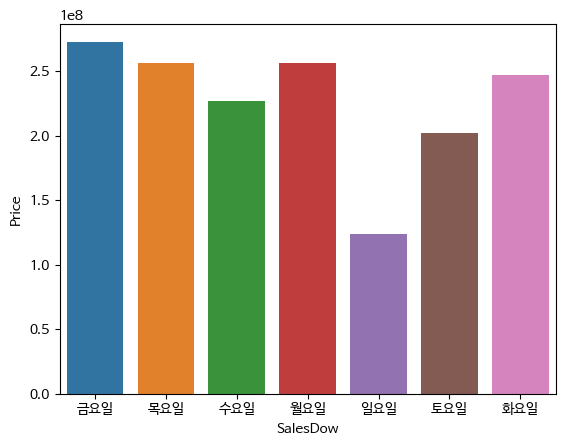

In [46]:
sns.barplot(x=Price_Dow['SalesDow'], y=Price_Dow['Price'])

# 년도별 매출

In [47]:
a=set(list(data1['SalesDate'].str[0:4]))
a=list(a)
a

['2020', '2021']

In [48]:
Price_Year=data1.groupby(data1['SalesDate'].str[0:4], as_index=False).agg('Price').sum()
Price_Year=pd.DataFrame(Price_Year)
Price_Year

,Price
0,751589370
1,833033200


<AxesSubplot:ylabel='Price'>

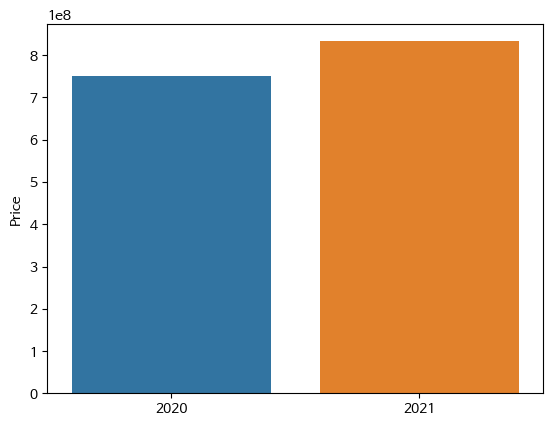

In [49]:
sns.barplot(x=a, y=Price_Year['Price'])

# 월별 매출

In [50]:
a=set(list(data1['SalesDate'].str[5:7]))
a=sorted(list(a))
a

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [51]:
Price_Month=data1.groupby(data1['SalesDate'].str[5:7]).agg('Price').sum()
Price_Month=pd.DataFrame(Price_Month)
Price_Month

,Price
SalesDate,
01,96172930
02,73417230
03,109260240
04,120884230
05,138323140
06,143084870
07,154344510
08,158288510
09,155487570


<AxesSubplot:ylabel='Price'>

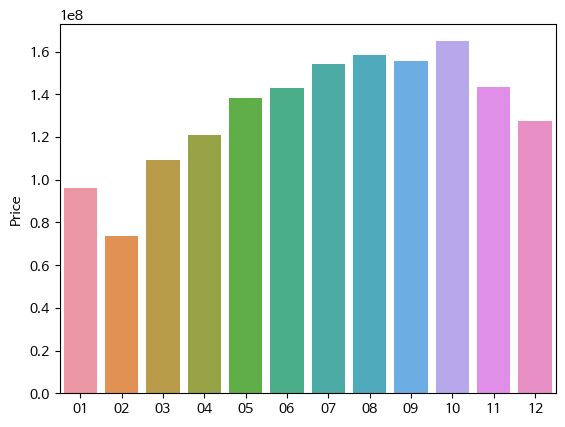

In [52]:
sns.barplot(x=a, y=Price_Month['Price'])

# 년도 월별 매출

In [53]:
Years=set(list(data1['SalesDate'].str[0:7]))
Years=sorted(list(Years))
Years

['2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12']

In [54]:
Price_Year_Month=data1.groupby(data1['SalesDate'].str[0:7]).agg('Price').sum()
Price_Year_Month=pd.DataFrame(Price_Year_Month)
Price_Year_Month

,Price
SalesDate,
2020-01,45693140
2020-02,35603970
2020-03,51538520
2020-04,57107850
2020-05,65530860
2020-06,67976260
2020-07,71766740
2020-08,75732090
2020-09,73478840


[Text(0, 0, '2020-01'),
 Text(1, 0, '2020-02'),
 Text(2, 0, '2020-03'),
 Text(3, 0, '2020-04'),
 Text(4, 0, '2020-05'),
 Text(5, 0, '2020-06'),
 Text(6, 0, '2020-07'),
 Text(7, 0, '2020-08'),
 Text(8, 0, '2020-09'),
 Text(9, 0, '2020-10'),
 Text(10, 0, '2020-11'),
 Text(11, 0, '2020-12'),
 Text(12, 0, '2021-01'),
 Text(13, 0, '2021-02'),
 Text(14, 0, '2021-03'),
 Text(15, 0, '2021-04'),
 Text(16, 0, '2021-05'),
 Text(17, 0, '2021-06'),
 Text(18, 0, '2021-07'),
 Text(19, 0, '2021-08'),
 Text(20, 0, '2021-09'),
 Text(21, 0, '2021-10'),
 Text(22, 0, '2021-11'),
 Text(23, 0, '2021-12')]

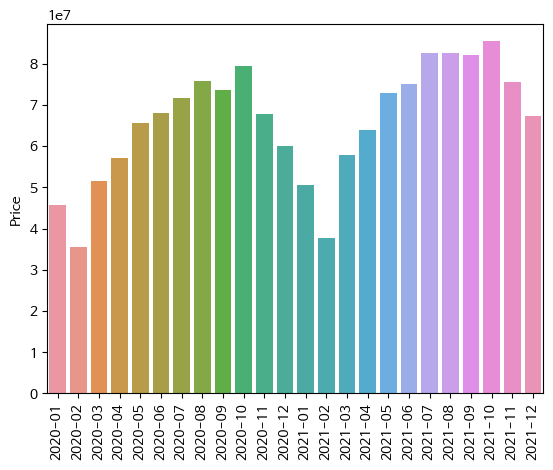

In [55]:
YM= sns.barplot(x=Years, y=Price_Year_Month['Price'])
YM.set_xticklabels(YM.get_xticklabels(),rotation=90)

In [56]:
df

,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,ItemId,...,ItemNameMiddle,Item_CatORMaker,Price,TempAvg,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,TempDiff
0,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801007795751,...,가공식사,CJ,10000,-2.2,-6.5,0.3,9.83,0.1,64.4,6.8
1,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801056170059,...,음료,롯,2200,-2.2,-6.5,0.3,9.83,0.1,64.4,6.8
2,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8809640112157,...,식재료,PSK,6800,-2.2,-6.5,0.3,9.83,0.1,64.4,6.8
3,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8801045611211,...,식재료,오뚜기,3000,1.3,-3.2,6.6,0.00,0.0,45.6,9.8
4,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8809253648470,...,아이스링크,22del,3500,1.3,-3.2,6.6,0.00,0.0,45.6,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510218,U100831,U100831-POS2021-10299,2021-09-10T15:33:00,2021-09-10,2021,2021-09,9,금요일,15,I-8804989201326,...,안주류,현대,3000,23.6,19.5,28.9,0.00,0.0,76.0,9.4
510219,U100831,U100831-POS2021-10299,2021-09-10T15:33:00,2021-09-10,2021,2021-09,9,금요일,15,I-8809617945115,...,안주류,길림,2000,23.6,19.5,28.9,0.00,0.0,76.0,9.4
510220,U100831,U100831-POS2021-10299,2021-09-10T15:33:00,2021-09-10,2021,2021-09,9,금요일,15,I-8809811824100,...,가공식사,신,3400,23.6,19.5,28.9,0.00,0.0,76.0,9.4
510221,U100831,U100831-POS2021-10302,2021-09-12T09:13:30,2021-09-12,2021,2021-09,9,일요일,9,I-8801007075259,...,식재료,CJ,1600,24.2,19.2,29.8,0.00,0.0,64.6,10.6


# 월별 인기 품목

In [112]:
Item_Month=df.groupby(['SalesYear'])['ItemNameMiddle'].agg(max()-min()).reset_index()
Item_Month.head()

TypeError: max expected at least 1 argument, got 0

In [110]:
sns.barplot(x='ItemNameMiddle',y='0',hue='SalesYear',data=Item_Month)

ValueError: Could not interpret input '0'

In [94]:
Item_Month2= Item_Month.groupby(['SalesMonth','0']).max()
Item_Month2

KeyError: '0'

In [59]:
for i in range(12):
    k=i*16
    a= Item_Month2.iloc[k:k+16,:]
    print(a)

                ItemNameMiddle
SalesMonth size               
1          67             즉석커피
           289           아이스링크
           336            베이커리
           398             튀김류
           701          주먹밥/김밥
           826             도시락
           1005       샌드위치/햄버거
           1116            유제품
           1653          아이스크림
           1943            안주류
           2745       껌/초콜릿/캔디
           3073         스낵/비스켓
           3369          빵/디저트
           3532             음료
           4207            식재료
           5741           가공식사
                ItemNameMiddle
SalesMonth size               
2          48             즉석커피
           237            베이커리
           261           아이스링크
           287             튀김류
           506          주먹밥/김밥
           644             도시락
           765        샌드위치/햄버거
           828             유제품
           1370          아이스크림
           1446            안주류
           2041       껌/초콜릿/캔디
           2195         스낵/비스켓
        

# 년도별 인기품목

In [60]:
Item_Year=df.groupby(['SalesYear','ItemNameMiddle'], as_index=False).size()
Item_Year

,SalesYear,ItemNameMiddle,size
0,2020,가공식사,43296
1,2020,껌/초콜릿/캔디,19936
2,2020,도시락,6092
3,2020,베이커리,2444
4,2020,빵/디저트,23888
5,2020,샌드위치/햄버거,7520
6,2020,스낵/비스켓,22692
7,2020,식재료,31158
8,2020,아이스링크,3767
9,2020,아이스크림,14831


In [61]:
Item_Year=df.groupby(['SalesYear','ItemNameMiddle'], as_index=False).size()
Item_Year2= Item_Year.groupby(['SalesYear','size']).max()
Item_Year2

ItemNameMiddle
SalesYear size                
2020      441             즉석커피
          2444            베이커리
          3012             튀김류
          3767           아이스링크
          5472          주먹밥/김밥
          6092             도시락
          7520        샌드위치/햄버거
          8093             유제품
          14831          아이스크림
          17817            안주류
          19936       껌/초콜릿/캔디
          22692         스낵/비스켓
          23888          빵/디저트
          31158            식재료
          32768             음료
          43296           가공식사
2021      498             즉석커피
          2690            베이커리
          3365             튀김류
          4266           아이스링크
          5907          주먹밥/김밥
          6550             도시락
          8051        샌드위치/햄버거
          8778             유제품
          18052          아이스크림
          19150            안주류
          21927       껌/초콜릿/캔디
          24904         스낵/비스켓
          26091          빵/디저트
          34240            식재료
          35803             음료
          46724           가공식사

# 년도 월별 인기품목

In [62]:
Item_Year_Month=df.groupby(['SalesYearMonth','ItemNameMiddle'], as_index=False).size()
Item_Year_Month

,SalesYearMonth,ItemNameMiddle,size
0,2020-01,가공식사,2736
1,2020-01,껌/초콜릿/캔디,1315
2,2020-01,도시락,382
3,2020-01,베이커리,158
4,2020-01,빵/디저트,1638
...,...,...,...
379,2021-12,유제품,716
380,2021-12,음료,2472
381,2021-12,주먹밥/김밥,452
382,2021-12,즉석커피,48


In [63]:
Item_Year_Month=df.groupby(['SalesYearMonth','ItemNameMiddle'], as_index=False).size()
Item_Year_Month2= Item_Year_Month.groupby(['SalesYearMonth','size']).max()
Item_Year_Month2

ItemNameMiddle
SalesYearMonth size               
2020-01        27             즉석커피
               154           아이스링크
               158            베이커리
               200             튀김류
               348          주먹밥/김밥
...                            ...
2021-12        2044         스낵/비스켓
               2276          빵/디저트
               2472             음료
               2784            식재료
               3721           가공식사

[383 rows x 1 columns]

In [64]:
for i in range(24):
    k=i*16
    a= Item_Year_Month2.iloc[k:k+16,:]
    print(a)

                    ItemNameMiddle
SalesYearMonth size               
2020-01        27             즉석커피
               154           아이스링크
               158            베이커리
               200             튀김류
               348          주먹밥/김밥
               382             도시락
               472        샌드위치/햄버거
               543             유제품
               652           아이스크림
               983             안주류
               1315       껌/초콜릿/캔디
               1425         스낵/비스켓
               1638          빵/디저트
               1705             음료
               2022            식재료
               2736           가공식사
                    ItemNameMiddle
SalesYearMonth size               
2020-02        20             즉석커피
               103            베이커리
               127           아이스링크
               133             튀김류
               257          주먹밥/김밥
               323             도시락
               363        샌드위치/햄버거
               414             유제품
               574  

# 온도별 인기품목

In [65]:
Item_Temp=df.groupby(['TempAvg','ItemNameMiddle'], as_index=False).size()
Item_Temp

,TempAvg,ItemNameMiddle,size
0,-14.9,가공식사,116
1,-14.9,껌/초콜릿/캔디,50
2,-14.9,도시락,15
3,-14.9,베이커리,6
4,-14.9,빵/디저트,50
...,...,...,...
5082,31.7,유제품,28
5083,31.7,음료,104
5084,31.7,주먹밥/김밥,13
5085,31.7,즉석커피,1


In [66]:
Item_Temp=df.groupby(['TempAvg','ItemNameMiddle'], as_index=False).size()
Item_Temp2= Item_Temp.groupby(['TempAvg','size']).max()
Item_Temp2

ItemNameMiddle
TempAvg size               
-14.9   1              즉석커피
        2             아이스링크
        6              베이커리
        7               튀김류
        10              유제품
...                     ...
 31.7   66            빵/디저트
        74           스낵/비스켓
        99              식재료
        104              음료
        144            가공식사

[4867 rows x 1 columns]

# 계절별 인기품목

In [67]:
df["SalesDate"]

0         2020-01-01
1         2020-01-01
2         2020-01-01
3         2020-01-05
4         2020-01-05
             ...    
510218    2021-09-10
510219    2021-09-10
510220    2021-09-10
510221    2021-09-12
510222    2021-09-13
Name: SalesDate, Length: 510223, dtype: object

In [68]:
#계절별 매출 변화
def Season(x):
        if  3<=x and x<=5 : return "봄"  
        elif x >= 6 and x <=8: return '여름'  
        elif x >= 9 and x <=11: return "가을" 
        else: return "겨울"
df["계절"]=df["SalesDate"].str[5:7].astype("int").apply(Season)
df["계절"]

0         겨울
1         겨울
2         겨울
3         겨울
4         겨울
          ..
510218    가을
510219    가을
510220    가을
510221    가을
510222    가을
Name: 계절, Length: 510223, dtype: object

In [69]:
Item_Season=df.groupby(['계절','ItemNameMiddle'], as_index=False).size()
Item_Season

,계절,ItemNameMiddle,size
0,가을,가공식사,26257
1,가을,껌/초콜릿/캔디,12350
2,가을,도시락,3727
3,가을,베이커리,1568
4,가을,빵/디저트,14342
...,...,...,...
59,여름,유제품,4825
60,여름,음료,20867
61,여름,주먹밥/김밥,3310
62,여름,즉석커피,257


In [70]:
Item_Season=df.groupby(['계절','ItemNameMiddle'], as_index=False).size()
Item_Season2= Item_Season.groupby(['계절','size']).max()
Item_Season2

ItemNameMiddle
계절 size                
가을 276             즉석커피
   1568            베이커리
   1847             튀김류
   2383           아이스링크
   3335          주먹밥/김밥
...                 ...
여름 13504         스낵/비스켓
   13786          빵/디저트
   18602            식재료
   20867             음료
   25448           가공식사

[64 rows x 1 columns]

In [71]:
for i in range(4):
    k=i*16
    a= Item_Season2.iloc[k:k+16,:]
    print(a)

         ItemNameMiddle
계절 size                
가을 276             즉석커피
   1568            베이커리
   1847             튀김류
   2383           아이스링크
   3335          주먹밥/김밥
   3727             도시락
   4530        샌드위치/햄버거
   4863             유제품
   9669           아이스크림
   10646            안주류
   12350       껌/초콜릿/캔디
   13962         스낵/비스켓
   14342          빵/디저트
   19003            식재료
   20496             음료
   26257           가공식사
         ItemNameMiddle
계절 size                
겨울 199             즉석커피
   950            아이스링크
   994             베이커리
   1185             튀김류
   2114          주먹밥/김밥
   2473             도시락
   3088        샌드위치/햄버거
   3348             유제품
   5124           아이스크림
   6500             안주류
   8286        껌/초콜릿/캔디
   9214          스낵/비스켓
   10217          빵/디저트
   11253             음료
   12510            식재료
   17442           가공식사
         ItemNameMiddle
계절 size                
봄  207             즉석커피
   1161            베이커리
   1559             튀김류
   1767         

# 폭염 폭우 한파 파생변수 만들기

In [72]:
weather=pd.read_csv('//home/piai/바탕화면/cvs_weather.csv',encoding='cp949')
weather

,AreaId,Area,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax
0,108,서울,2020-01-01,-2.2,-6.5,1,0.3,1457,9.83,0.1,64.4,0.0,NaN
1,108,서울,2020-01-02,1.0,-0.7,1,3.8,1500,NaN,NaN,65.4,NaN,NaN
2,108,서울,2020-01-03,-0.1,-3.4,807,4.6,1547,NaN,NaN,56.9,NaN,NaN
3,108,서울,2020-01-04,1.2,-2.8,512,6.1,1450,NaN,NaN,50.8,NaN,NaN
4,108,서울,2020-01-05,1.3,-3.2,821,6.6,1453,NaN,NaN,45.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,108,서울,2021-12-27,-7.6,-12.9,123,-3.9,1634,2.08,0.0,60.9,NaN,NaN
727,108,서울,2021-12-28,-4.1,-8.5,712,-0.9,1600,NaN,NaN,73.8,NaN,NaN
728,108,서울,2021-12-29,0.4,-3.8,154,5.9,1518,1.58,0.2,72.9,0.3,455.0
729,108,서울,2021-12-30,-3.9,-6.8,714,0.2,1531,0.50,0.0,48.5,NaN,NaN


In [73]:
for i in range(730):
    if weather['TempMax'][i]>=33:
        weather['비고']='폭염'
        print(weather['dateObs'][i],weather['비고'][i])  

2020-06-13 폭염
2020-06-22 폭염
2020-08-25 폭염
2020-08-26 폭염
2021-07-14 폭염
2021-07-15 폭염
2021-07-16 폭염
2021-07-18 폭염
2021-07-21 폭염
2021-07-22 폭염
2021-07-23 폭염
2021-07-24 폭염
2021-07-25 폭염
2021-07-26 폭염
2021-07-27 폭염
2021-07-28 폭염
2021-07-29 폭염
2021-07-30 폭염
2021-07-31 폭염
2021-08-04 폭염
2021-08-05 폭염
2021-08-09 폭염


In [74]:
for i in range(730):
    if weather['TempMin'][i]<=-12:
        weather['비고']='한파'
        print(weather['dateObs'][i],weather['비고'][i])  

2020-12-30 한파
2020-12-31 한파
2021-01-06 한파
2021-01-07 한파
2021-01-08 한파
2021-01-09 한파
2021-01-10 한파
2021-12-25 한파
2021-12-26 한파
2021-12-27 한파


In [75]:
for i in range(730):
    if weather['RainfallAmount'][i]>=80:
        weather['비고']='폭우'
        print(weather['dateObs'][i],weather['비고'][i])    

2020-07-23 폭우
2020-08-03 폭우
2020-08-11 폭우
2020-11-19 폭우
